In [70]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


backend = Aer.get_backend('statevector_simulator')

#
# Function returns gaussian window encoded into wavefunction
#
def gauss_vector(num_qubits):
    # Gaussian window
    g = signal.gaussian(2**num_qubits, (2**num_qubits)/12)
    # Normalize sum to 1
    g = g / np.sum(g)
    # Make statevector
    return np.sqrt(g)

#
# Function prints wavefunction formated for generator
#
def wf_to_str(wf):
    s = ""
    for a in wf:
        if(len(s)):
            s += ", "
        s += "{num.real:.15}{num.imag:+.15}j".format(num=a)
        #s += "{0:.15f}".format(a)
    return "[" + s + "]"


# 3-Qubit


Input wavefunction:

[0.000787059406737902+0.0j, 0.0230012474551989+0.0j, 0.218229759761641+0.0j, 0.67219498295314+0.0j, 0.67219498295314+0.0j, 0.218229759761641+0.0j, 0.0230012474551989+0.0j, 0.000787059406737902+0.0j]

Input distribution:

array([6.19462510e-07, 5.29057384e-04, 4.76242280e-02, 4.51846095e-01,
       4.51846095e-01, 4.76242280e-02, 5.29057384e-04, 6.19462510e-07])

Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
ry(2.5143313) q[0];
ry(3.088119) q[1];
ry(1.5612583) q[2];
cx q[2],q[0];
cx q[2],q[1];



┌────────────┐┌───┐     
q_0: ┤ RY(2.5143) ├┤ X ├─────
     ├────────────┤└─┬─┘┌───┐
q_1: ┤ RY(3.0881) ├──┼──┤ X ├
     ├────────────┤  │  └─┬─┘
q_2: ┤ RY(1.5613) ├──■────■──
     └────────────┘


Output distribution:

array([3.43367134e-05, 3.26414971e-04, 4.80100854e-02, 4.56398096e-01,
       4.47774221e-01, 4.71029104e-02, 3.20247193e-04, 3.36879037e-05])

L1 distance: 0.010009287847838853


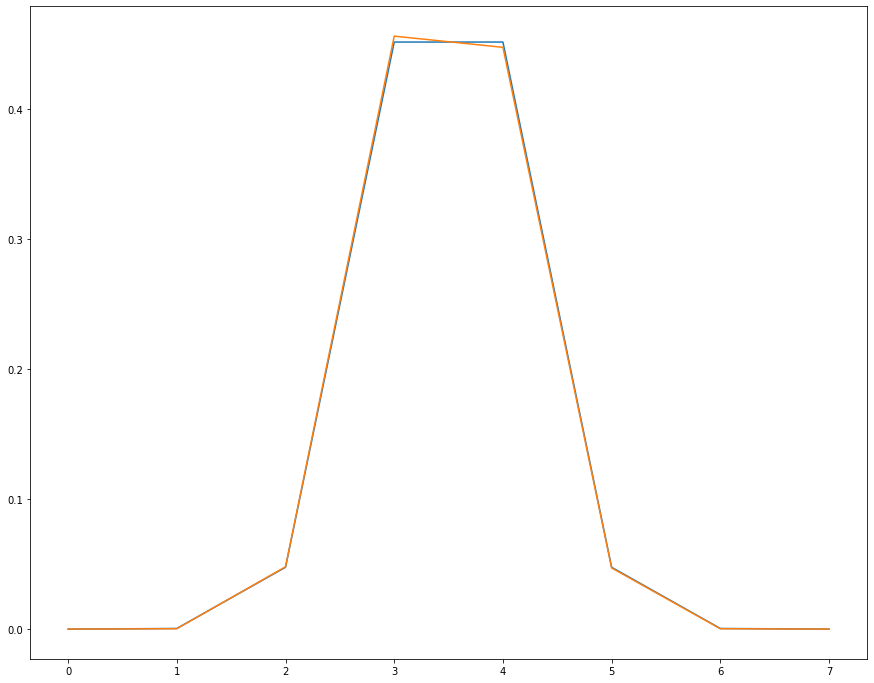

In [75]:
#
# 3 Qubits
#

num_qubits = 3

# Make wavefunction

input_vector = gauss_vector(num_qubits)
input_dist = np.power(np.abs(input_vector), 2)

# This circuit is returned by generator (external tool)

qc = QuantumCircuit()
q = QuantumRegister(num_qubits, 'q')
qc.add_register(q)

qc.ry(2.514331340789795, q[0])
qc.ry(3.088119029998779, q[1])
qc.ry(1.561258316040039, q[2])
qc.cx(q[2], q[0])
qc.cx(q[2], q[1])


job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2


print("\nInput wavefunction:\n")
print(wf_to_str(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

display(qc.draw())

print("\nOutput distribution:\n")
print(repr(output_dist))

print("\nL1 distance:", np.sum(np.abs(input_dist-output_dist)))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()


# 4-Qubit (shallow)


Input wavefunction:

[0.000200746718318334+0.0j, 0.00143769153507452+0.0j, 0.00777208700872065+0.0j, 0.0317149673817285+0.0j, 0.0976889768920859+0.0j, 0.227133676315302+0.0j, 0.398632016369683+0.0j, 0.528101619627912+0.0j, 0.528101619627912+0.0j, 0.398632016369683+0.0j, 0.227133676315302+0.0j, 0.0976889768920859+0.0j, 0.0317149673817285+0.0j, 0.00777208700872065+0.0j, 0.00143769153507452+0.0j, 0.000200746718318334+0.0j]

Input distribution:

array([4.02992449e-08, 2.06695695e-06, 6.04053365e-05, 1.00583916e-03,
       9.54313621e-03, 5.15897069e-02, 1.58907484e-01, 2.78891321e-01,
       2.78891321e-01, 1.58907484e-01, 5.15897069e-02, 9.54313621e-03,
       1.00583916e-03, 6.04053365e-05, 2.06695695e-06, 4.02992449e-08])

Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry(1.9162209) q[0];
ry(2.418613) q[1];
ry(3.0149975) q[2];
ry(1.5208477) q[3];
cx q[3],q[0];
cx q[3],q[1];
cx q[3],q[2];



┌────────────┐┌───┐          
q_0: ┤ RY(1.9162) ├┤ X ├──────────
     ├────────────┤└─┬─┘┌───┐     
q_1: ┤ RY(2.4186) ├──┼──┤ X ├─────
     ├───────────┬┘  │  └─┬─┘┌───┐
q_2: ┤ RY(3.015) ├───┼────┼──┤ X ├
     ├───────────┴┐  │    │  └─┬─┘
q_3: ┤ RY(1.5208) ├──■────■────■──
     └────────────┘


Output distribution:

array([8.68865094e-05, 1.75847119e-04, 6.07754406e-04, 1.23001674e-03,
       2.16280293e-02, 4.37723493e-02, 1.51283901e-01, 3.06179156e-01,
       2.77059296e-01, 1.36895704e-01, 3.96092811e-02, 1.95710467e-02,
       1.11303322e-03, 5.49952549e-04, 1.59122781e-04, 7.86229716e-05])

L1 distance: 0.10253034444169218


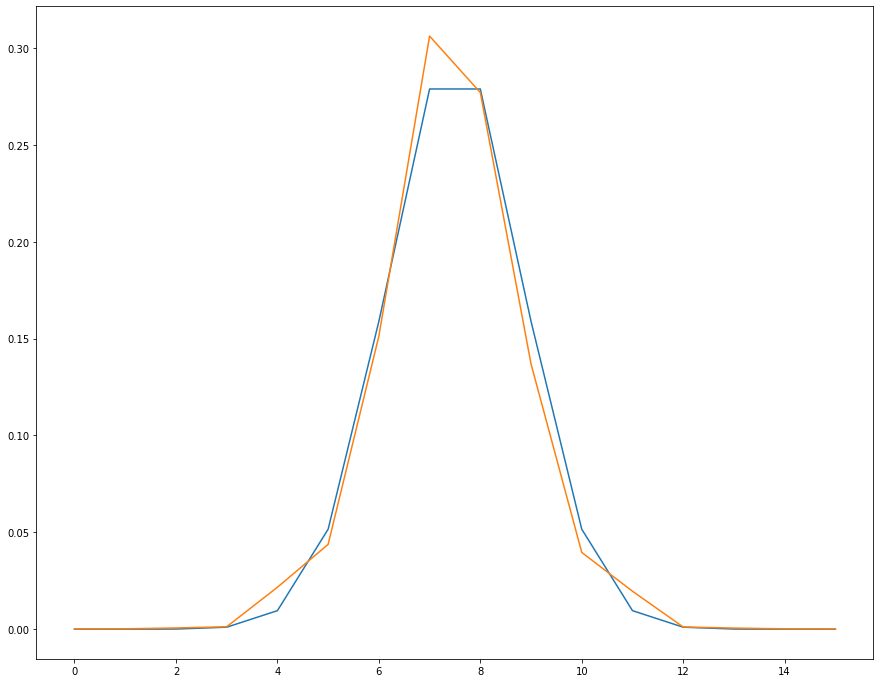

In [76]:
#
# 4 Qubits
#

num_qubits = 4

# Make wavefunction

input_vector = gauss_vector(num_qubits)
input_dist = np.power(np.abs(input_vector), 2)

# This circuit is returned by generator (external tool)

qc = QuantumCircuit()
q = QuantumRegister(num_qubits, 'q')
qc.add_register(q)

qc.ry(1.916220903396606, q[0])
qc.ry(2.418612957000732, q[1])
qc.ry(3.014997482299805, q[2])
qc.ry(1.520847678184509, q[3])
qc.cx(q[3], q[0])
qc.cx(q[3], q[1])
qc.cx(q[3], q[2])


job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2

print("\nInput wavefunction:\n")
print(wf_to_str(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

display(qc.draw())

print("\nOutput distribution:\n")
print(repr(output_dist))

print("\nL1 distance:", np.sum(np.abs(input_dist-output_dist)))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()



# 4-Qubit (deep)


Input wavefunction:

[0.000200746718318334+0.0j, 0.00143769153507452+0.0j, 0.00777208700872065+0.0j, 0.0317149673817285+0.0j, 0.0976889768920859+0.0j, 0.227133676315302+0.0j, 0.398632016369683+0.0j, 0.528101619627912+0.0j, 0.528101619627912+0.0j, 0.398632016369683+0.0j, 0.227133676315302+0.0j, 0.0976889768920859+0.0j, 0.0317149673817285+0.0j, 0.00777208700872065+0.0j, 0.00143769153507452+0.0j, 0.000200746718318334+0.0j]

Input distribution:

array([4.02992449e-08, 2.06695695e-06, 6.04053365e-05, 1.00583916e-03,
       9.54313621e-03, 5.15897069e-02, 1.58907484e-01, 2.78891321e-01,
       2.78891321e-01, 1.58907484e-01, 5.15897069e-02, 9.54313621e-03,
       1.00583916e-03, 6.04053365e-05, 2.06695695e-06, 4.02992449e-08])

Returned circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry(1.9335214) q[0];
ry(3.0607967) q[2];
ry(-0.44268686) q[3];
cx q[3],q[0];
ry(-0.44920471) q[3];
cx q[3],q[1];
ry(1.5697198) q[1];
ry(1.5596577) q[3];
cx q[3],q[0];
cx q[3],q[2];



┌────────────┐ ┌───┐                                  ┌───┐     
q_0: ─┤ RY(1.9335) ├─┤ X ├──────────────────────────────────┤ X ├─────
      └────────────┘ └─┬─┘               ┌───┐┌────────────┐└─┬─┘     
q_1: ──────────────────┼─────────────────┤ X ├┤ RY(1.5697) ├──┼───────
      ┌────────────┐   │                 └─┬─┘└────────────┘  │  ┌───┐
q_2: ─┤ RY(3.0608) ├───┼───────────────────┼──────────────────┼──┤ X ├
     ┌┴────────────┴┐  │  ┌─────────────┐  │  ┌────────────┐  │  └─┬─┘
q_3: ┤ RY(-0.44269) ├──■──┤ RY(-0.4492) ├──■──┤ RY(1.5597) ├──■────■──
     └──────────────┘     └─────────────┘     └────────────┘


Output distribution:

array([1.71812791e-05, 8.66891405e-05, 2.61309616e-04, 4.56187807e-04,
       1.05163244e-02, 5.30607251e-02, 1.59942498e-01, 2.79223622e-01,
       2.76813549e-01, 1.59137801e-01, 5.01349371e-02, 9.53943548e-03,
       4.52250297e-04, 2.59994924e-04, 8.19090693e-05, 1.55852650e-05])

L1 distance: 0.009278964594886134


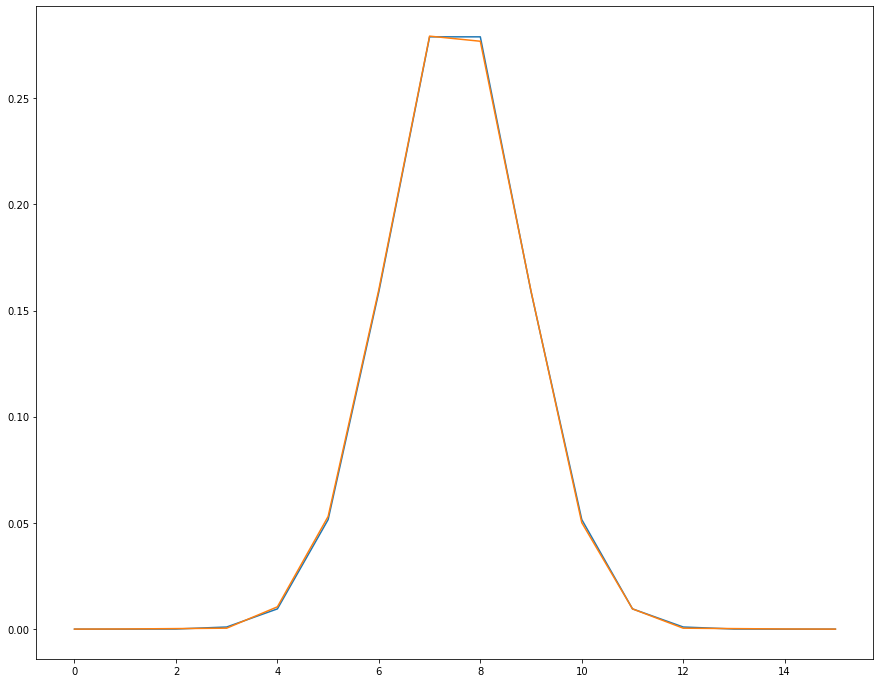

In [77]:
#
# 4 Qubits
#

num_qubits = 4

# Make wavefunction

input_vector = gauss_vector(num_qubits)
input_dist = np.power(np.abs(input_vector), 2)

# This circuit is returned by generator (external tool)

qc = QuantumCircuit()
q = QuantumRegister(num_qubits, 'q')
qc.add_register(q)

qc.ry(1.933521389961243, q[0])
qc.ry(3.060796737670898, q[2])
qc.ry(-0.442686855792999, q[3])
qc.cx(q[3], q[0])
qc.ry(-0.449204713106155, q[3])
qc.cx(q[3], q[1])
qc.ry(1.569719791412354, q[1])
qc.ry(1.559657692909241, q[3])
qc.cx(q[3], q[0])
qc.cx(q[3], q[2])


job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2

print("\nInput wavefunction:\n")
print(wf_to_str(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

display(qc.draw())

print("\nOutput distribution:\n")
print(repr(output_dist))

print("\nL1 distance:", np.sum(np.abs(input_dist-output_dist)))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()



# 5-Qubit


Input wavefunction:

[8.30412608671388e-05+0.0j, 0.000238417920716126+0.0j, 0.000638039442258143+0.0j, 0.0015915483129964+0.0j, 0.00370046069541316+0.0j, 0.00801965035402441+0.0j, 0.016200139027938+0.0j, 0.0305032222072636+0.0j, 0.0535348221871528+0.0j, 0.087577124165219+0.0j, 0.133539167479952+0.0j, 0.189797425949317+0.0j, 0.251440737143626+0.0j, 0.310487866766301+0.0j, 0.357369344060226+0.0j, 0.3834013394338+0.0j, 0.3834013394338+0.0j, 0.357369344060226+0.0j, 0.310487866766301+0.0j, 0.251440737143626+0.0j, 0.189797425949317+0.0j, 0.133539167479952+0.0j, 0.087577124165219+0.0j, 0.0535348221871528+0.0j, 0.0305032222072636+0.0j, 0.016200139027938+0.0j, 0.00801965035402441+0.0j, 0.00370046069541316+0.0j, 0.0015915483129964+0.0j, 0.000638039442258143+0.0j, 0.000238417920716126+0.0j, 8.30412608671388e-05+0.0j]

Input distribution:

array([6.89585101e-09, 5.68431049e-08, 4.07094330e-07, 2.53302603e-06,
       1.36934094e-05, 6.43147918e-05, 2.62444505e-04, 9.30446565e-04,
       2.86597719

┌────────────┐┌───┐               
q_0: ┤ RY(1.7228) ├┤ X ├───────────────
     ├────────────┤└─┬─┘┌───┐          
q_1: ┤ RY(1.8995) ├──┼──┤ X ├──────────
     ├────────────┤  │  └─┬─┘┌───┐     
q_2: ┤ RY(2.4254) ├──┼────┼──┤ X ├─────
     ├────────────┤  │    │  └─┬─┘┌───┐
q_3: ┤ RY(3.0541) ├──┼────┼────┼──┤ X ├
     ├────────────┤  │    │    │  └─┬─┘
q_4: ┤ RY(1.5708) ├──■────■────■────■──
     └────────────┘


Output distribution:

array([1.68849007e-05, 2.29091941e-05, 3.29804375e-05, 4.47473904e-05,
       1.20582232e-04, 1.63604264e-04, 2.35527280e-04, 3.19560078e-04,
       8.80649459e-03, 1.19485271e-02, 1.72012882e-02, 2.33384642e-02,
       6.28909099e-02, 8.53294956e-02, 1.22841689e-01, 1.66669863e-01,
       1.66680846e-01, 1.22849783e-01, 8.53351182e-02, 6.28950540e-02,
       2.33400020e-02, 1.72024217e-02, 1.19493144e-02, 8.80707488e-03,
       3.19581134e-04, 2.35542800e-04, 1.63615044e-04, 1.20590177e-04,
       4.47503389e-05, 3.29826107e-05, 2.29107037e-05, 1.68860133e-05])

L1 distance: 0.12087780994068967


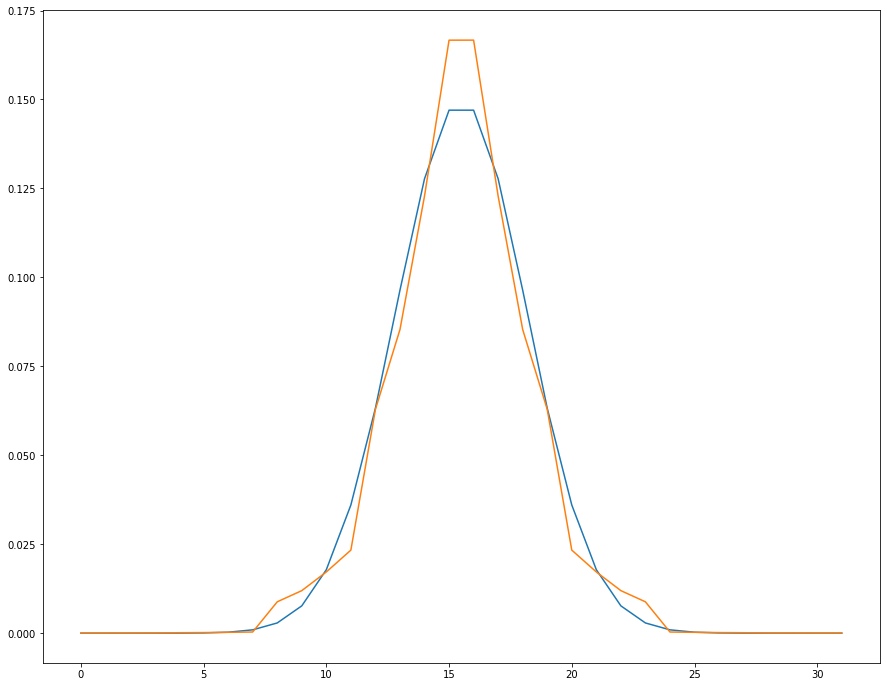

In [78]:
#
# 5 Qubits
#

num_qubits = 5

# Make wavefunction

input_vector = gauss_vector(num_qubits)
input_dist = np.power(np.abs(input_vector), 2)

# This circuit is returned by generator (external tool)

qc = QuantumCircuit()
q = QuantumRegister(num_qubits, 'q')
qc.add_register(q)

qc.ry(1.7227672338, q[0])
qc.ry(1.899461627, q[1])
qc.ry(2.4254486561, q[2])
qc.ry(3.054074049, q[3])
qc.ry(1.5708292723, q[4])
qc.cx(q[4], q[0])
qc.cx(q[4], q[1])
qc.cx(q[4], q[2])
qc.cx(q[4], q[3])

job = execute(qc, backend=backend)
job_result = job.result()

output_vector = job_result.get_statevector(qc)
output_dist = np.abs(output_vector)**2


print("\nInput wavefunction:\n")
print(wf_to_str(input_vector))

print("\nInput distribution:\n")
print(repr(input_dist))

print("\nReturned circuit:\n")
print(qc.qasm())

display(qc.draw())

print("\nOutput distribution:\n")
print(repr(output_dist))

print("\nL1 distance:", np.sum(np.abs(input_dist-output_dist)))

plt.figure(figsize=(15, 12))
plt.plot(range(len(input_dist)), input_dist)
plt.plot(range(len(output_dist)), output_dist)
plt.show()
